In [9]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)
library(ggplot2)

In [2]:
data(rrates)

In [3]:
str(rrates)

'data.frame':	48 obs. of  4 variables:
 $ Run   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Conc.O: num  134.5 108 68.6 49.5 41.7 ...
 $ Temp  : int  623 623 623 623 623 623 623 623 623 623 ...
 $ Rate  : int  218 189 192 174 152 139 118 120 122 132 ...


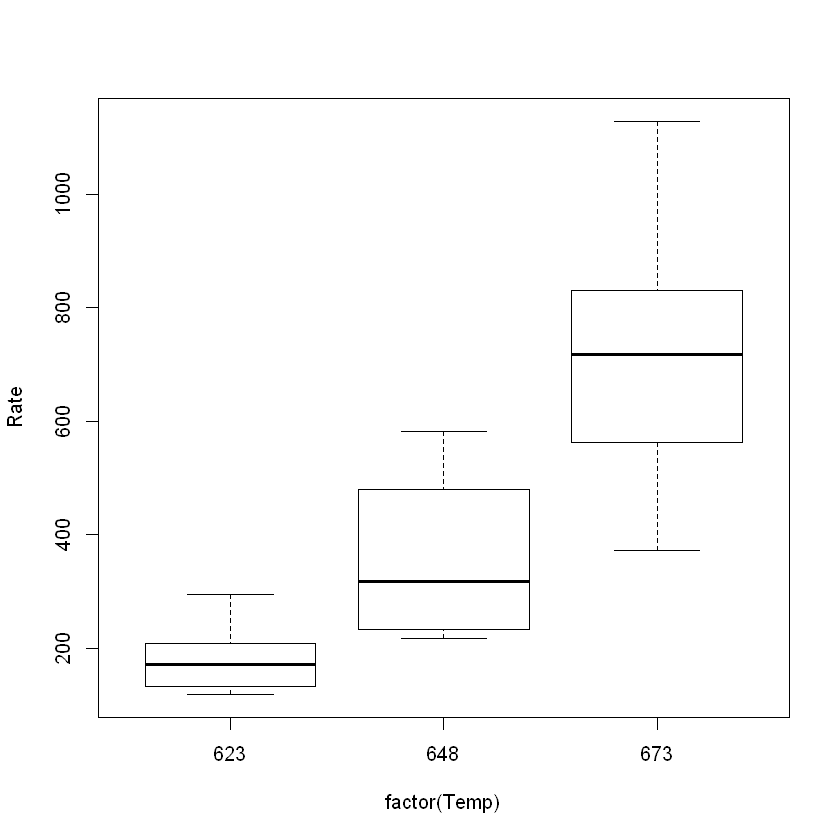

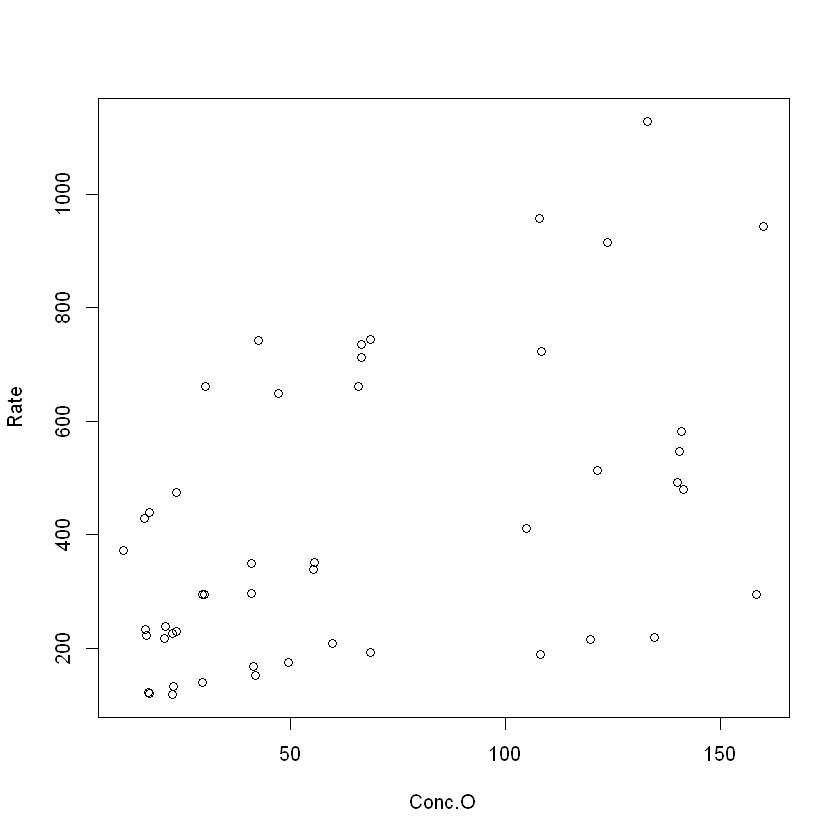

In [7]:
with(rrates, {
plot(Rate ~ factor(Temp))
plot(Rate ~ Conc.O)
})

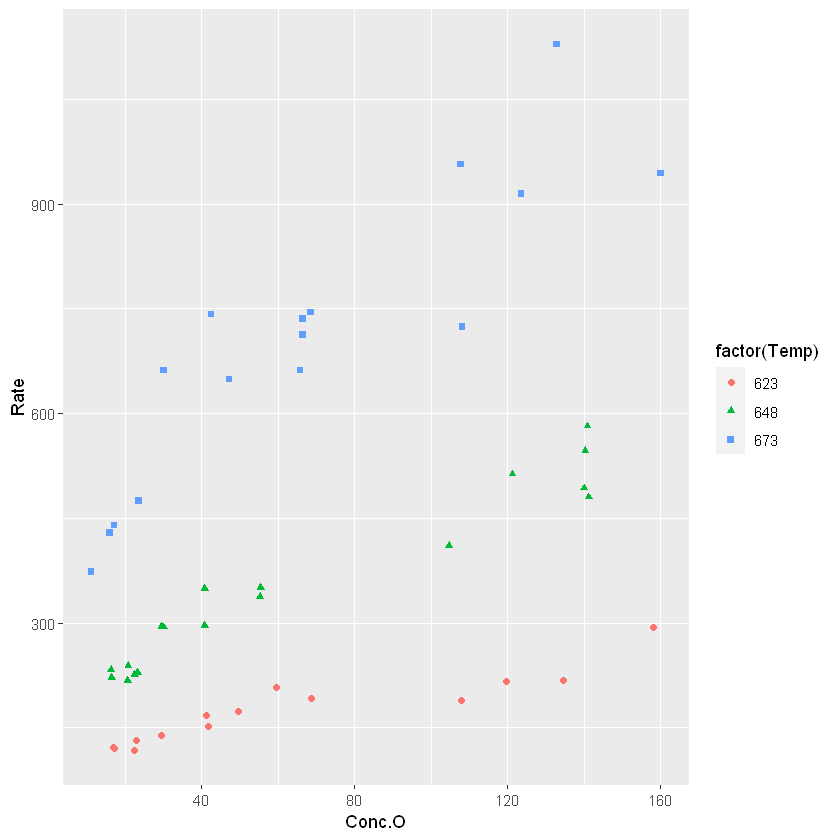

In [15]:
ggplot(rrates, aes(Conc.O, Rate, shape=factor(Temp), color=factor(Temp))) + geom_point()

In [22]:
glm.1 <- glm(Rate ~ log(Conc.O)*factor(Temp), data=rrates, family = Gamma(link="log"))

In [23]:
coef(summary(glm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.80780466,0.13202336,28.8419001,2.605767e-29
log(Conc.O),0.34006000,0.03337417,10.1893183,6.390370e-13
factor(Temp)648,0.42410781,0.17035674,2.4895276,1.683615e-02
factor(Temp)673,1.27645198,0.17629869,7.2402808,6.601603e-09
log(Conc.O):factor(Temp)648,0.06845296,0.04315176,1.5863306,1.201656e-01
log(Conc.O):factor(Temp)673,0.02375192,0.04422633,0.5370539,5.940643e-01


In [24]:
anova(glm.1, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,47,18.4079187,NA,NA
log(Conc.O),1,4.7044736,46,13.7034451,549.192063,9.658632e-26
factor(Temp),2,13.3261096,44,0.3773355,777.833427,6.531672e-34
log(Conc.O):factor(Temp),2,0.0235731,42,0.3537624,1.375941,2.637531e-01


In [25]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1)
gof.pearson / df.residual(glm.1)

[1] 1

[1] 1

[1] 0.008422915

[1] 0.008566172


	Shapiro-Wilk normality test

data:  qr1
W = 0.9725, p-value = 0.316


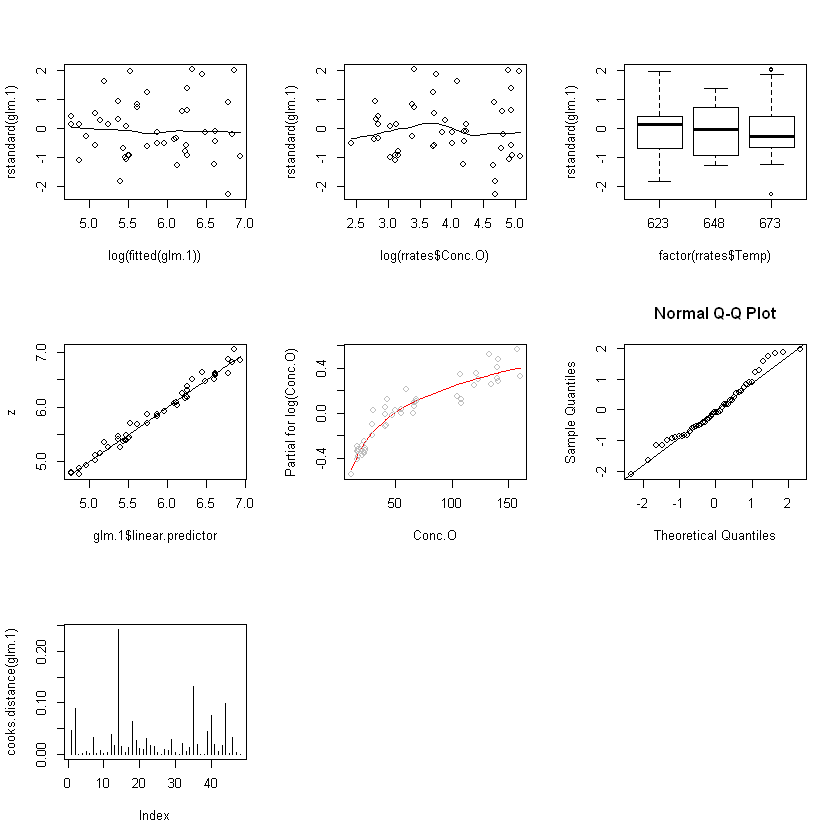

In [26]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.1) ~ log(fitted(glm.1)))
scatter.smooth(rstandard(glm.1) ~ log(rrates$Conc.O))
plot(rstandard(glm.1) ~ factor(rrates$Temp))
z <- resid(glm.1, type="working") + glm.1$linear.predictor
scatter.smooth(z ~ glm.1$linear.predictor)
termplot(glm.1, partial.resid = TRUE, terms="log(Conc.O)")
qqnorm(qr1 <- qresid(glm.1))
qqline(qr1)
plot(cooks.distance(glm.1), type="h")
shapiro.test(qr1)

In [27]:
colSums(influence.measures(glm.1)$is.inf)

dfb.1_      dfb.lg(C.O)       dfb.f(T)64       dfb.f(T)67 
               0                1                0                0 
dfb.l(C.O):(T)64 dfb.l(C.O):(T)67            dffit            cov.r 
               0                0                1                3 
          cook.d              hat 
               0                0

In [30]:
glm.2 <- glm(Rate ~ (Conc.O + I(Conc.O))*factor(Temp), data=rrates, family = Gamma(link = "inverse"))

In [32]:
coef(summary(glm.2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),7.770837e-03,4.199136e-04,18.505803,8.277452e-22
Conc.O,-2.709099e-05,4.112403e-06,-6.587629,5.669966e-08
factor(Temp)648,-3.543065e-03,4.639215e-04,-7.637208,1.807674e-09
factor(Temp)673,-5.772786e-03,4.328248e-04,-13.337467,1.080088e-16
Conc.O:factor(Temp)648,1.003391e-05,4.487427e-06,2.236006,3.072149e-02
Conc.O:factor(Temp)673,1.977762e-05,4.233947e-06,4.671201,3.073052e-05


In [33]:
anova(glm.2, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,47,18.407919,NA,NA
Conc.O,1,3.906773e+00,46,14.501146,194.11016,2.404248e-17
I(Conc.O),0,0.000000e+00,46,14.501146,NA,NA
factor(Temp),2,1.285758e+01,44,1.643565,319.41796,3.929556e-26
Conc.O:factor(Temp),2,7.876543e-01,42,0.855911,19.56752,9.882297e-07
I(Conc.O):factor(Temp),0,1.887379e-15,42,0.855911,NA,NA


In [31]:
gof.dev <- deviance(glm.2)
gof.pearson <- sum(glm.2$weights * glm.2$residuals^2)

pchisq(gof.dev, df=df.residual(glm.2), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.2), lower.tail = FALSE)

gof.dev / df.residual(glm.2)
gof.pearson / df.residual(glm.2)

[1] 1

[1] 1

[1] 0.02037883

[1] 0.02012658


	Shapiro-Wilk normality test

data:  qr2
W = 0.97357, p-value = 0.3465


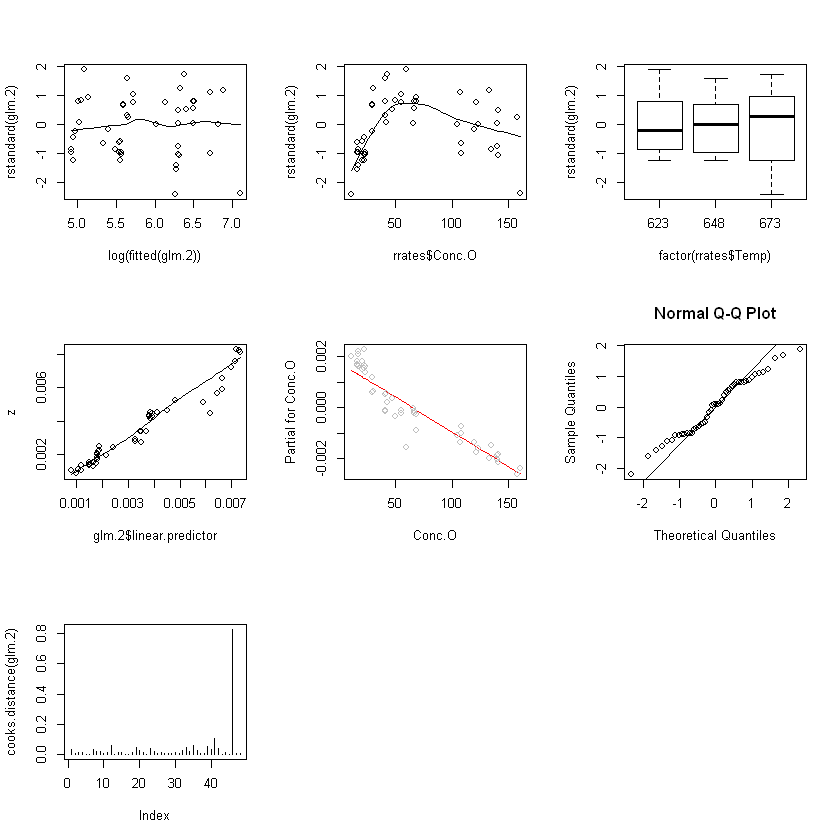

In [36]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.2) ~ log(fitted(glm.2)))
scatter.smooth(rstandard(glm.2) ~ rrates$Conc.O)
plot(rstandard(glm.2) ~ factor(rrates$Temp))
z <- resid(glm.2, type="working") + glm.2$linear.predictor
scatter.smooth(z ~ glm.2$linear.predictor)
termplot(glm.2, partial.resid = TRUE, terms="Conc.O")
qqnorm(qr2 <- qresid(glm.2))
qqline(qr2)
plot(cooks.distance(glm.2), type="h")
shapiro.test(qr2)

In [37]:
colSums(influence.measures(glm.2)$is.inf)

dfb.1_      dfb.Cn.O    dfb.f(T)64    dfb.f(T)67 dfb.C.O:(T)64 
            0             0             0             0             0 
dfb.C.O:(T)67         dffit         cov.r        cook.d           hat 
            0             1             3             0             2

In [38]:
extractAIC(glm.1)
extractAIC(glm.2)

[1]   6.0000 475.5173

[1]   6.0000 518.0109